In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Load the image
img = cv2.imread(r"D:\Malathi\ART\painting\1630783619_51-oir-mobi-p-zheltaya-chainaya-roza-tsveti-krasivo-foto-57.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

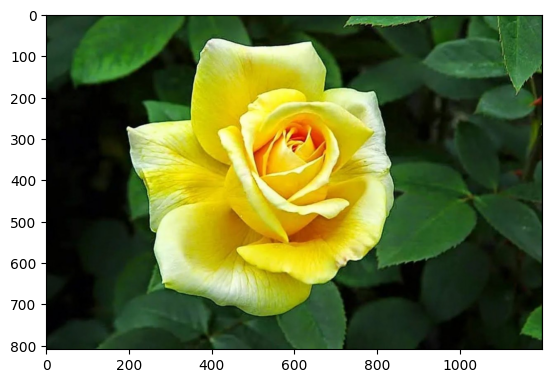

In [32]:
plt.imshow(img)

PSNR between the original and noisy image 0: 28.65831256026003 dB
PSNR between the original and noisy image 1: 27.874696357704863 dB
PSNR between the original and noisy image 2: 27.855686873681883 dB
SSIM_score: 0.07089091248864282
SSIM_score: 0.08272409785146821
SSIM_score: 0.09974329748196453
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\vinod\miniconda3\envs\speed\lib\site-packages\lpips\weights\v0.1\vgg.pth
LPIPS: 0.9081251621246338
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\vinod\miniconda3\envs\speed\lib\site-packages\lpips\weights\v0.1\vgg.pth
LPIPS: 0.8774158358573914
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\vinod\miniconda3\envs\speed\lib\site-packages\lpips\weights\v0.1\vgg.pth
LPIPS: 0.8292679190635681


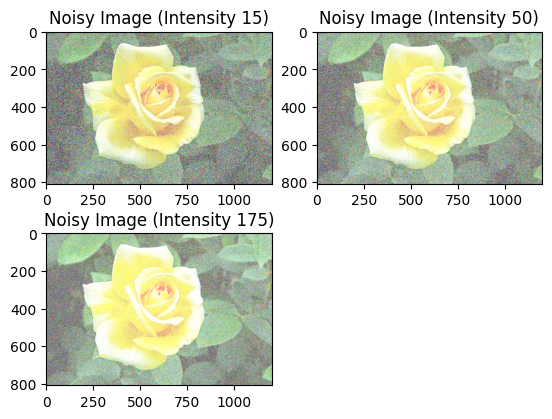

In [46]:
def generate_gaussian_noise(shape, intensity):
    row, col, ch = shape
    mean = 0
    sigma = intensity
    gauss = np.random.normal(mean, sigma, (row, col, ch)).astype(np.uint8)
    return gauss

intensities = [15, 50, 175]

for i, noise_intensity in enumerate(intensities):
    noise = generate_gaussian_noise(img.shape, noise_intensity)
    noisy_img = cv2.add(img, noise)
    plt.subplot(2,2, i+1)
    plt.imshow(noisy_img)
    plt.title(f'Noisy Image (Intensity {noise_intensity})')
    
for i, noise_intensity in enumerate(intensities):
    noise = generate_gaussian_noise(img.shape, noise_intensity)
    noisy_img = cv2.add(img, noise)

    psnr = calculate_psnr(img, noisy_img)

    print(f"PSNR between the original and noisy image {i}: {psnr} dB")
    
for i, noise_intensity in enumerate(intensities):
    noise = generate_gaussian_noise(img.shape, noise_intensity)
    noisy_img = cv2.add(img, noise)
    find_ssim(img, noisy_img)
    
for i, noise_intensity in enumerate(intensities):
    noise = generate_gaussian_noise(img.shape, noise_intensity)
    noisy_img = cv2.add(img, noise)
    find_lpips(img, noisy_img)

PSNR between the original and noisy image 2: 35.92259915339432 dB
SSIM_score: 0.9048046295833462
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\vinod\miniconda3\envs\speed\lib\site-packages\lpips\weights\v0.1\vgg.pth
LPIPS: 0.23763781785964966


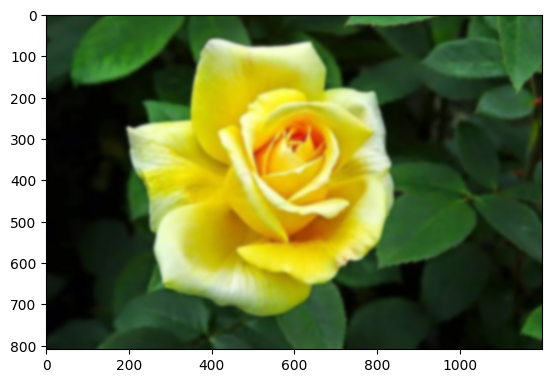

In [47]:
# Gaussian Blur 
Gaussian = cv2.GaussianBlur(img, (21, 21), 0) 
plt.imshow(Gaussian)
psnr = calculate_psnr(img, Gaussian)
print(f"PSNR between the original and noisy image {i}: {psnr} dB")
find_ssim(img, Gaussian)
find_lpips(img, Gaussian)

PSNR between the original and noisy image 2: 31.794364518228086 dB
SSIM_score: 0.7999983678160629
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\vinod\miniconda3\envs\speed\lib\site-packages\lpips\weights\v0.1\vgg.pth
LPIPS: 0.37499040365219116


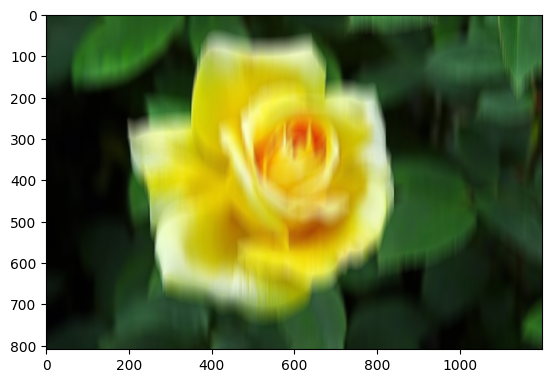

In [48]:
# Motion Blur
kernel_size = 50
  
# Create the vertical kernel. 
kernel_v = np.zeros((kernel_size, kernel_size)) 
  
# Fill the middle row with ones. 
kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size) 
  
# Normalize. 
kernel_v /= kernel_size 
  
# Apply the vertical kernel. 
vertical_mb = cv2.filter2D(img, -1, kernel_v) 
  
plt.imshow(vertical_mb)
psnr = calculate_psnr(img, vertical_mb)
print(f"PSNR between the original and noisy image {i}: {psnr} dB")
find_ssim(img, vertical_mb)
find_lpips(img, vertical_mb)

PSNR between the original and noisy image 2: 33.4665287500403 dB
SSIM_score: 0.8347380422739429
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\vinod\miniconda3\envs\speed\lib\site-packages\lpips\weights\v0.1\vgg.pth
LPIPS: 0.34983575344085693


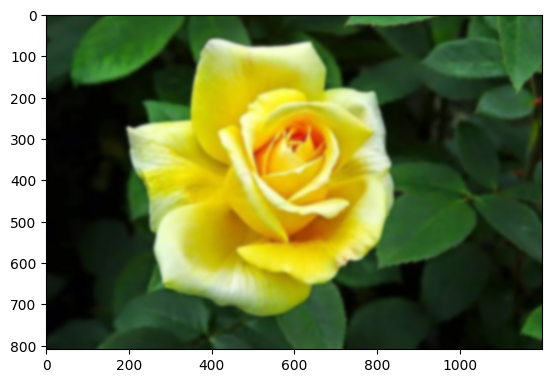

In [49]:
# Defocus Blur 
defocus_amt = 50
defocus = cv2.GaussianBlur(img, (21, 21), defocus_amt) 
plt.imshow(Gaussian)

psnr = calculate_psnr(img, defocus)
print(f"PSNR between the original and noisy image {i}: {psnr} dB")
find_ssim(img, defocus)
find_lpips(img, defocus)

In [45]:
import lpips
import torch
def find_lpips(original, corrupt):
    lpips_loss_fn = lpips.LPIPS(net='vgg')

    img_tensor = torch.tensor(original.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    corrupt_tensor = torch.tensor(corrupt.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    lpips_value = lpips_loss_fn(img_tensor, corrupt_tensor).item()
    print(f"LPIPS: {lpips_value}")

In [34]:
def calculate_psnr(original, noisy):
    original_image_float32 = original.astype(np.float32)
    noisy_image_float32 = noisy.astype(np.float32)
    mse = np.mean((original - noisy) ** 2)
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

In [35]:
from skimage.metrics import structural_similarity as ssim
def find_ssim(original, corrupt):
    grayA = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(corrupt, cv2.COLOR_BGR2GRAY)
    (score, diff) = ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    print("SSIM_score: {}".format(score))